In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def update_weights(topology, weights):
    j = 0
    for i in range(len(weights)):
        if j==3:
            j=0
        if i < 3: # w1x
            topology[1][1][j][1] = weights[i]
            j+=1
        elif i < 6: #w2x
            topology[2][1][j][1] = weights[i]
            j+=1
        elif i < 9: #w3x
            topology[3][1][j][1] = weights[i]
            j+=1

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

def update_input(topology, x, y, classe):
    topology[0][1][0]=x
    topology[0][1][1]=y
    topology[0][1][2]=classe
    
def draw_plot(topology, out1, out2, classe, title):
    
    w0=topology[1][1][0][1]
    w1=topology[1][1][1][1]
    w2=topology[1][1][2][1]
    y1 = (-w0-w1)/w2
    y2 = (-w0)/w2
    x  = [1, 0]
    y  = [y1, y2]
    plt.plot(x, y, color='purple')
    
    for i in range(len(out1)):
        if classe[i] < 0.5:
            color = 'blue'
        else:
            color = 'red'
        plt.scatter(out1[i], out2[i], color=color,s=10)
    
    plt.title(title)
    plt.xlabel('out1')
    plt.ylabel('out2')
    plt.grid()
    plt.show()

In [3]:
df = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/lab4/data/ct-21-22.xlsx')

C:\Users\utilizador\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df

,x,y,classe
0,-6.760254,-2.438752,0
1,0.237898,-8.227674,0
2,2.009494,0.624965,0
3,-9.850935,0.177774,0
4,-1.074828,-8.673791,0
5,-1.196868,8.340757,0
6,7.636788,9.787538,0
7,-0.631973,5.123220,0
8,-8.275424,-2.379850,0
9,-0.198645,-8.716467,0


In [5]:
training_data = np.array([df['x'], df['y'], df['classe']])
training_data

array([[-6.76025397,  0.23789822,  2.0094937 , -9.85093506, -1.074828  ,
        -1.19686783,  7.63678818, -0.63197295, -8.2754244 , -0.19864485,
        -8.48735019,  4.28280372,  0.69537397, -3.94629569,  1.85485846,
         5.36741011,  1.59226476, -0.88923701,  8.59138084,  1.26332346,
        -7.41034783],
       [-2.43875235, -8.22767423,  0.62496517,  0.17777441, -8.673791  ,
         8.34075721,  9.78753795,  5.12321978, -2.3798495 , -8.71646728,
        -6.66456714,  9.9602949 ,  7.20053649, -5.0715989 , -3.64752792,
        -5.91374189, -0.53585524,  1.85876023, -8.97012882, -1.80663509,
         5.64182498],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ]])

def nn_topology(num_layers, nodes_per_layer, connections):
    # to-do

In [6]:
topology = np.array([
    [ 'input',
        [
            ['x', '-'],
            ['y', '-'],
            ['classe', '-']
        ],    
    ],
    [ 'n1',
        [
            ['w10', 1],
            ['w11', '-'],
            ['w12', '-'],
            0, # delta1   
            0  # o1
        ]
    ],
    [ 'n2',
        [
            ['w20', 1],
            ['w21', '-'],
            ['w22', '-'],
            0, # delta2 
            0  # o2
        ]
    ],
    [ 'n3',
        [
            ['w30', 1],
            ['w31', '-'],
            ['w32', '-'],
            0, # delta3
            0  # o3
        ]
    ]
])

<ipython-input-6-bd2f284901f8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topology = np.array([


In [7]:
print(topology)

[['input' list([['x', '-'], ['y', '-'], ['classe', '-']])]
 ['n1' list([['w10', 1], ['w11', '-'], ['w12', '-'], 0, 0])]
 ['n2' list([['w20', 1], ['w21', '-'], ['w22', '-'], 0, 0])]
 ['n3' list([['w30', 1], ['w31', '-'], ['w32', '-'], 0, 0])]]


In [8]:
update_weights(topology, [0.4, 1.4, 1.0, -1.5, 1, -0.5, 5.4, -8.0, -10.0])
print(topology)

[['input' list([['x', '-'], ['y', '-'], ['classe', '-']])]
 ['n1' list([['w10', 0.4], ['w11', 1.4], ['w12', 1.0], 0, 0])]
 ['n2' list([['w20', -1.5], ['w21', 1], ['w22', -0.5], 0, 0])]
 ['n3' list([['w30', 5.4], ['w31', -8.0], ['w32', -10.0], 0, 0])]]


In [9]:
training_data

array([[-6.76025397,  0.23789822,  2.0094937 , -9.85093506, -1.074828  ,
        -1.19686783,  7.63678818, -0.63197295, -8.2754244 , -0.19864485,
        -8.48735019,  4.28280372,  0.69537397, -3.94629569,  1.85485846,
         5.36741011,  1.59226476, -0.88923701,  8.59138084,  1.26332346,
        -7.41034783],
       [-2.43875235, -8.22767423,  0.62496517,  0.17777441, -8.673791  ,
         8.34075721,  9.78753795,  5.12321978, -2.3798495 , -8.71646728,
        -6.66456714,  9.9602949 ,  7.20053649, -5.0715989 , -3.64752792,
        -5.91374189, -0.53585524,  1.85876023, -8.97012882, -1.80663509,
         5.64182498],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ]])

In [10]:
update_input(topology, training_data[0][0], training_data[1][0], training_data[2][0])
print(topology)

[['input' list([-6.760253967, -2.438752346, 0.0])]
 ['n1' list([['w10', 0.4], ['w11', 1.4], ['w12', 1.0], 0, 0])]
 ['n2' list([['w20', -1.5], ['w21', 1], ['w22', -0.5], 0, 0])]
 ['n3' list([['w30', 5.4], ['w31', -8.0], ['w32', -10.0], 0, 0])]]


In [11]:
def calculate_ssod(topology): # calculate sums, sigmoids, outputs and deltas
    sum1 = 1*topology[1][1][0][1] + topology[0][1][0]*topology[1][1][1][1] + topology[0][1][1]*topology[1][1][2][1]
    sig1 = sigmoid(sum1)
    out1 = 1 / (1 + math.exp(-sum1))
    
    sum2 = 1*topology[2][1][0][1] + topology[0][1][0]*topology[2][1][1][1] + topology[0][1][1]*topology[2][1][2][1]
    sig2 = sigmoid(sum2)
    out2 = 1 / (1 + math.exp(-sum2))
    
    sum3 = 1*topology[3][1][0][1] + out1*topology[3][1][1][1] + out2*topology[3][1][2][1]
    sig3 = sigmoid(sum3)
    out3 = 1 / (1 + math.exp(-sum3))
    
    delta3 = out3*(1-out3)*(topology[0][1][2] - out3)
    delta1 = out1*(1-out1)*topology[3][1][1][1]*delta3
    delta2 = out2*(1-out2)*topology[3][1][2][1]*delta3
    
    return np.array([['sums', [sum1, sum2, sum3]], ['sigmoids', [sig1, sig2, sig3]], ['outputs', [out1, out2, out3]],  ['deltas', [delta1, delta2, delta3]]])

backpropagation = calculate_ssod(topology)
print('sum1, sum2, sum3: ')
print(backpropagation[0][1])
print('\nsig1, sig2, sig3: ')
print(backpropagation[1][1])
print('\nout1, out2, out3: ')
print(backpropagation[2][1])
print('\ndelta1, delta2, delta3: ')
print(backpropagation[3][1])



sum1, sum2, sum3: 
[-11.503107899799998, -7.040877794000001, 5.3911732889439605]

sig1, sig2, sig3: 
[1.0098557173726497e-05, 0.0008745922598650376, 0.9954640446810432]

out1, out2, out3: 
[1.0098557173726497e-05, 0.0008745922598650376, 0.9954640446810432]

delta1, delta2, delta3: 
[3.6313227823143915e-07, 3.9277655553302354e-05, -0.004494898864430347]


<ipython-input-11-48ceb34b5495>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([['sums', [sum1, sum2, sum3]], ['sigmoids', [sig1, sig2, sig3]], ['outputs', [out1, out2, out3]],  ['deltas', [delta1, delta2, delta3]]])


In [12]:
print('topology:')
print(topology)
print('\nbackpropagation:')
print(backpropagation)

topology:
[['input' list([-6.760253967, -2.438752346, 0.0])]
 ['n1' list([['w10', 0.4], ['w11', 1.4], ['w12', 1.0], 0, 0])]
 ['n2' list([['w20', -1.5], ['w21', 1], ['w22', -0.5], 0, 0])]
 ['n3' list([['w30', 5.4], ['w31', -8.0], ['w32', -10.0], 0, 0])]]

backpropagation:
[['sums'
  list([-11.503107899799998, -7.040877794000001, 5.3911732889439605])]
 ['sigmoids'
  list([1.0098557173726497e-05, 0.0008745922598650376, 0.9954640446810432])]
 ['outputs'
  list([1.0098557173726497e-05, 0.0008745922598650376, 0.9954640446810432])]
 ['deltas'
  list([3.6313227823143915e-07, 3.9277655553302354e-05, -0.004494898864430347])]]


In [13]:
def calculate_new_weights(topology, backpropagation, learning_factor):
    for i in range(3):
        for j in range(3):
            if j == 0:
                inputW=1
            elif i==2: # no caso do 3º neuronio, o input é o out1 ou out2
                inputW = backpropagation[2][1][j-1]
            else:
                inputW = topology[0][1][j-1]
            topology[i+1][1][j][1] += learning_factor*backpropagation[3][1][i]*inputW

calculate_new_weights(topology, backpropagation, 0.1)
print(topology)

[['input' list([-6.760253967, -2.438752346, 0.0])]
 ['n1'
  list([['w10', 0.40000003631322784], ['w11', 1.3999997545133576], ['w12', 0.9999999114410305], 0, 0])]
 ['n2'
  list([['w20', -1.4999960722344448], ['w21', 0.9999734473073232], ['w22', -0.5000095788474626], 0, 0])]
 ['n3'
  list([['w30', 5.399550510113557], ['w31', -8.0000000045392], ['w32', -10.000000393120375], 0, 0])]]


In [14]:
# reset à topologia
topology = np.array([
    [ 'input',
        [
            ['x', '-'],
            ['y', '-'],
            ['classe', '-']
        ],    
    ],
    [ 'n1',
        [
            ['w10', 1],
            ['w11', '-'],
            ['w12', '-'],
            0, # delta1   
            0  # o1
        ]
    ],
    [ 'n2',
        [
            ['w20', 1],
            ['w21', '-'],
            ['w22', '-'],
            0, # delta2 
            0  # o2
        ]
    ],
    [ 'n3',
        [
            ['w30', 1],
            ['w31', '-'],
            ['w32', '-'],
            0, # delta3
            0  # o3
        ]
    ]
])
update_weights(topology, [0.4, 1.4, 1.0, -1.5, 1, -0.5, 5.4, -8.0, -10.0])
print(topology)

[['input' list([['x', '-'], ['y', '-'], ['classe', '-']])]
 ['n1' list([['w10', 0.4], ['w11', 1.4], ['w12', 1.0], 0, 0])]
 ['n2' list([['w20', -1.5], ['w21', 1], ['w22', -0.5], 0, 0])]
 ['n3' list([['w30', 5.4], ['w31', -8.0], ['w32', -10.0], 0, 0])]]


<ipython-input-14-2ac78c4af767>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topology = np.array([


In [15]:
epoch = 1
error = 1
topology_not_fitted = topology
update_input(topology_not_fitted, training_data[0][0], training_data[1][0], training_data[2][0])
out1_not_fitted = []
out2_not_fitted = []
out3_not_fitted = []

while(error != 0):
    error = 0
    out1 = []
    out2 = []
    out3 = []
    for i in range(len(training_data[0])):
        
        update_input(topology, training_data[0][i], training_data[1][i], training_data[2][i])
        backpropagation = calculate_ssod(topology)
        calculate_new_weights(topology, backpropagation, 0.1)

        out1.append(backpropagation[2][1][0])
        out2.append(backpropagation[2][1][1])
        out3.append(backpropagation[2][1][2])
            
        if round(backpropagation[2][1][2]) != training_data[2][i]:
            error = 1
    
    if epoch==1:
        out1_not_fitted = out1
        out2_not_fitted = out2
        out3_not_fitted = out3
        
    print('epoch:' + str(epoch))
    epoch += 1

epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
epoch:8
epoch:9
epoch:10
epoch:11
epoch:12
epoch:13
epoch:14
epoch:15
epoch:16
epoch:17
epoch:18
epoch:19
epoch:20
epoch:21
epoch:22
epoch:23
epoch:24
epoch:25
epoch:26
epoch:27
epoch:28
epoch:29
epoch:30
epoch:31
epoch:32
epoch:33
epoch:34
epoch:35
epoch:36

<ipython-input-11-48ceb34b5495>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([['sums', [sum1, sum2, sum3]], ['sigmoids', [sig1, sig2, sig3]], ['outputs', [out1, out2, out3]],  ['deltas', [delta1, delta2, delta3]]])



epoch:37
epoch:38
epoch:39
epoch:40
epoch:41
epoch:42
epoch:43
epoch:44
epoch:45
epoch:46
epoch:47
epoch:48
epoch:49
epoch:50
epoch:51
epoch:52
epoch:53
epoch:54
epoch:55
epoch:56
epoch:57
epoch:58
epoch:59
epoch:60
epoch:61
epoch:62
epoch:63
epoch:64
epoch:65
epoch:66
epoch:67
epoch:68
epoch:69
epoch:70
epoch:71
epoch:72
epoch:73
epoch:74
epoch:75
epoch:76
epoch:77
epoch:78
epoch:79
epoch:80
epoch:81
epoch:82
epoch:83
epoch:84
epoch:85
epoch:86
epoch:87
epoch:88
epoch:89
epoch:90
epoch:91
epoch:92
epoch:93
epoch:94
epoch:95
epoch:96
epoch:97
epoch:98
epoch:99
epoch:100
epoch:101
epoch:102
epoch:103
epoch:104
epoch:105
epoch:106
epoch:107
epoch:108
epoch:109
epoch:110
epoch:111
epoch:112
epoch:113
epoch:114
epoch:115
epoch:116
epoch:117
epoch:118


# VER MELHOR O MODELO NÃO TREINADO

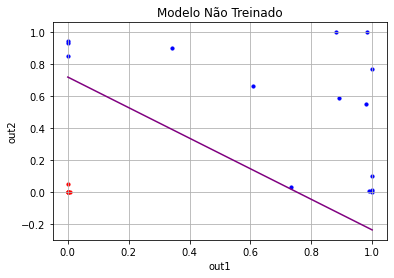

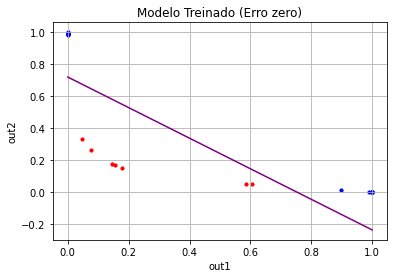

In [16]:
draw_plot(topology_not_fitted, out1_not_fitted, out2_not_fitted, out3_not_fitted, 'Modelo Não Treinado') 
draw_plot(topology, out1, out2, out3, 'Modelo Treinado (Erro zero)') 